In [1]:
import seaborn as sns
import geopandas as gpd
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

In [2]:
spark = (
 SparkSession.builder.appName("project 1 plot")
 .config("spark.sql.repl.eagerEval.enabled", True)
 .config("spark.executor.memory","4G")
 .config("spark.driver.memory","2G")
 .config("spark.sql.parquet.cacheMetadata", "true")
 .config("spark.sql.session.timeZone", "Etc/UTC")
 .config('spark.driver.maxResultSize', '2048m')
 .getOrCreate()
)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/21 00:36:35 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/08/21 00:36:36 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/08/21 00:36:36 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [3]:
df = pd.read_parquet('../data/curated/sample_data.parquet')

# Distribution and spread of tip amount #

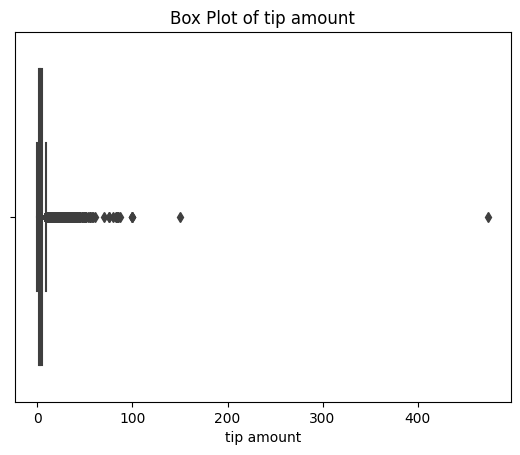

In [4]:
sns.boxplot(x=df['tip_amount'])
plt.title('Box Plot of tip amount')
plt.xlabel('tip amount')
plt.savefig('../plots/box_plot_tipamount.png')
plt.show()


In [5]:
# Remove those outliers
df_remove_outliers = df[df['tip_amount'] <= 120]

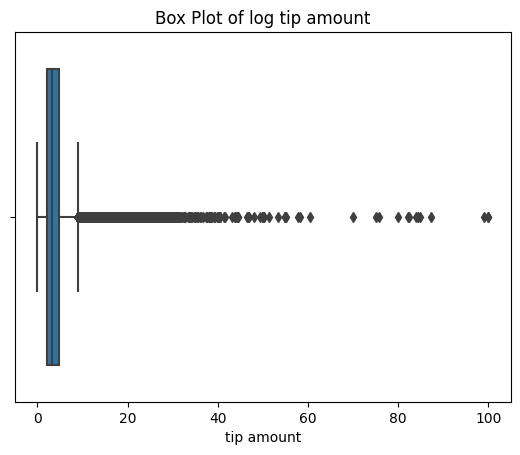

In [6]:
sns.boxplot(x=df_remove_outliers['tip_amount'])
plt.title('Box Plot of log tip amount')
plt.xlabel('tip amount')
plt.savefig('../plots/box_plot_tipamount_removedoutlier.png')
plt.show()


In [7]:
df_remove_outliers.to_parquet('../data/curated/sample_data_remove_outliers.parquet')

# Heat map #

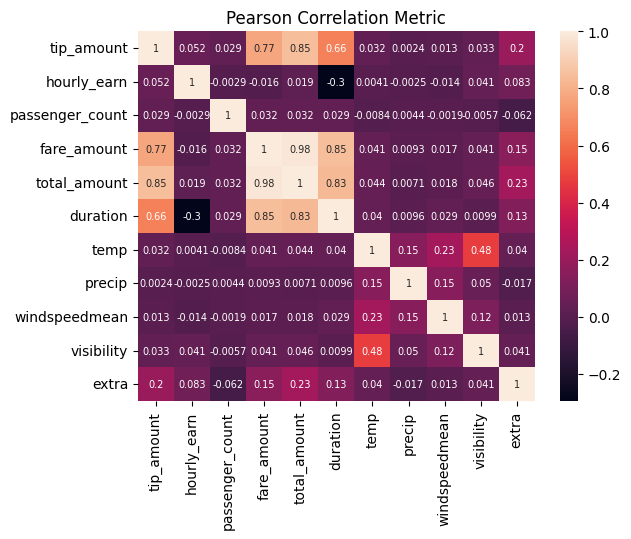

In [8]:
CORR_COLS = ['tip_amount','hourly_earn', 'passenger_count', 'fare_amount', 'total_amount','duration', 'temp', 'precip', 'windspeedmean', 'visibility', 'extra']

sns.heatmap(df_remove_outliers[CORR_COLS].corr(), annot = True, annot_kws={"size": 7})

plt.title('Pearson Correlation Metric')
plt.savefig('../plots/heat_map.png')
plt.show()


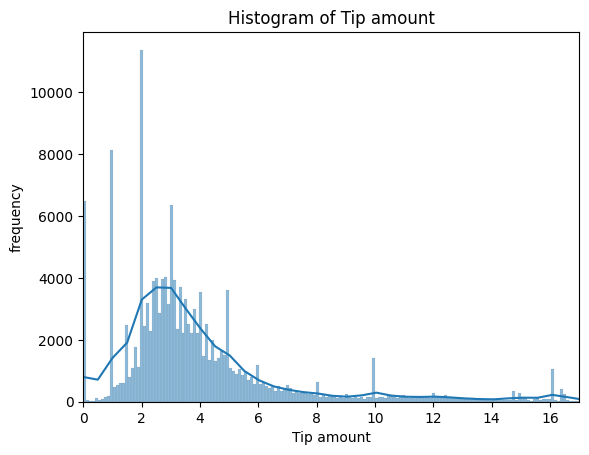

In [9]:
sns.histplot(df_remove_outliers['tip_amount'], kde=True)
plt.xlabel('Tip amount')
plt.ylabel('frequency')
plt.xlim(0, 17)
plt.title('Histogram of Tip amount')
plt.savefig('../plots/tip_histogram.png')
plt.show()


/Users/chengqian/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


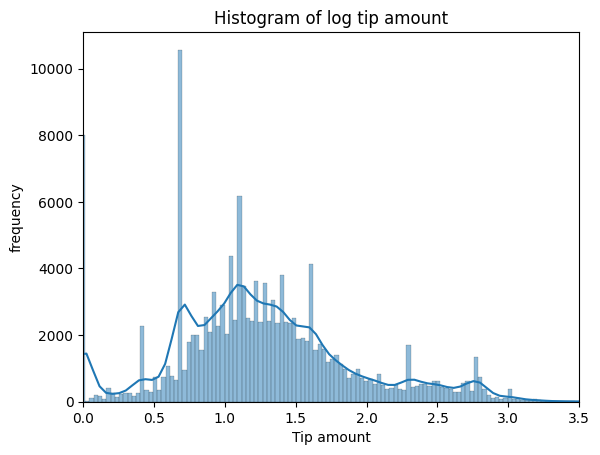

In [10]:
#log transformation on tip amount
log_transformed_data = np.log(df_remove_outliers['tip_amount'])
sns.histplot(log_transformed_data, kde=True)
plt.xlabel('Tip amount')
plt.ylabel('frequency')
plt.xlim(0,3.5)
plt.title('Histogram of log tip amount')
plt.savefig('../plots/log_tip_histogram.png')
plt.show()
